Load Data

In [4]:
import pandas as pd
clean_df = pd.read_csv('clean_reviews.csv')
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d47b30c8-00a3-4873-ab23-a601c817a851,bayu azl,https://play-lh.googleusercontent.com/a-/ALV-U...,kalau beli grabfood pengiriman hemat sengaja d...,1,0,5.343.0,2025-02-08 23:38:53,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApab...,2025-02-09 13:09:27,5.343.0
1,e79383cc-ee3d-4ec7-933b-9ce48d7478ba,Key_ Aleezah,https://play-lh.googleusercontent.com/a-/ALV-U...,"makin gak ngotak ongkos kirim nyagrab food,,, ...",1,0,5.343.0,2025-02-08 22:01:21,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApab...,2025-02-09 13:09:25,5.343.0
2,07c2fa0b-c57a-4bd2-b792-4fb3afc3f619,Agus Puryanto,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi busuk error saldo masih banyak masa d...,1,0,5.343.0,2025-02-08 21:49:06,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApab...,2025-02-09 13:09:22,5.343.0
3,89d79663-5536-4f54-837c-8017feb4a8db,sikhati nikmah,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat buruk. Seharusnya kalo pesanan didapur ...,1,0,5.343.0,2025-02-08 21:17:32,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApab...,2025-02-09 13:09:18,5.343.0
4,76272fe0-e71b-4113-8bbb-c0aed580c170,Dheja Gokiel,https://play-lh.googleusercontent.com/a-/ALV-U...,"Goofod y mahal"" ongkir y padahal langganan 24r...",1,0,5.342.0,2025-02-08 21:17:23,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApab...,2025-02-09 13:09:17,5.342.0


Text Preprocessing

In [5]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [6]:
# Fungsi preprocessing text
def cleaningText(text):
    # Menghapus mention (@username)
    text = re.sub(r'@[A-Za-z0-9_]+', ' ', text)
    # Menghapus hashtag
    text = re.sub(r'#\S+', ' ', text)
    # Menghapus RT
    text = re.sub(r'RT[\s]+', ' ', text)
    # Menghapus link
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'www.\S+', ' ', text)
    # Menghapus angka
    text = re.sub(r'\d+', ' ', text)
    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', ' ', text)
    # Menghapus karakter tunggal
    text = re.sub(r'\b\w\b', ' ', text)
    # Menghapus newline
    text = re.sub(r'\n', ' ', text)
    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def casefoldingText(text):
    return text.lower()

def tokenizingText(text):
    return text.split()

# Load custom stopwords
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words() + [
    'yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
    'kalo', 'amp', 'biar', 'bikin', 'bilang',
    'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
    'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
    'jd', 'jgn', 'sdh', 'aja', 'n', 't',
    'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
    '&amp', 'yah'
]

def filteringText(tokens):
    return [word for word in tokens if word not in stopwords]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmingText(text):
    return stemmer.stem(text)

def toSentence(list_words):
    return ' '.join(list_words)

# Proses preprocessing pada dataframe
def preprocess_data(df, text_column='content'):
    # Cleaning
    df['clean_text'] = df[text_column].apply(cleaningText)

    # Casefolding
    df['casefolded_text'] = df['clean_text'].apply(casefoldingText)

    # Tokenizing
    df['tokenized_text'] = df['casefolded_text'].apply(tokenizingText)

    # Filtering stopwords
    df['filtered_text'] = df['tokenized_text'].apply(filteringText)

    # Stemming
    df['stemmed_text'] = df['filtered_text'].apply(lambda x: [stemmingText(word) for word in x])

    # Convert ke kalimat
    df['preprocessed_text'] = df['stemmed_text'].apply(toSentence)

    return df

# Jalankan preprocessing
preprocessed_df = preprocess_data(clean_df)

# Hasil akhir
print(preprocessed_df[['content', 'preprocessed_text']].head())

# Simpan hasil preprocessing
preprocessed_df.to_csv('preprocessed_reviews.csv', index=False)

                                             content  \
0  kalau beli grabfood pengiriman hemat sengaja d...   
1  makin gak ngotak ongkos kirim nyagrab food,,, ...   
2  Aplikasi busuk error saldo masih banyak masa d...   
3  Sangat buruk. Seharusnya kalo pesanan didapur ...   
4  Goofod y mahal" ongkir y padahal langganan 24r...   

                                   preprocessed_text  
0  kalau beli grabfood kirim hemat sengaja lama l...  
1  makin ngotak ongkos kirim nyagrab food cuman j...  
2  aplikasi busuk error saldo banyak masa suruh t...  
3  sangat buruk pesan dapur sesuai estimasi waktu...  
4  goofod mahal ongkir padahal langgan rb anlimit...  


In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1979 non-null   object
 1   userName              1979 non-null   object
 2   userImage             1979 non-null   object
 3   content               1979 non-null   object
 4   score                 1979 non-null   int64 
 5   thumbsUpCount         1979 non-null   int64 
 6   reviewCreatedVersion  1979 non-null   object
 7   at                    1979 non-null   object
 8   replyContent          1979 non-null   object
 9   repliedAt             1979 non-null   object
 10  appVersion            1979 non-null   object
 11  clean_text            1979 non-null   object
 12  casefolded_text       1979 non-null   object
 13  tokenized_text        1979 non-null   object
 14  filtered_text         1979 non-null   object
 15  stemmed_text          1979 non-null   

In [8]:
clean_df.iloc[:,[3,12,13,14,15,16]].head()

,content,casefolded_text,tokenized_text,filtered_text,stemmed_text,preprocessed_text
0,kalau beli grabfood pengiriman hemat sengaja d...,kalau beli grabfood pengiriman hemat sengaja d...,"[kalau, beli, grabfood, pengiriman, hemat, sen...","[kalau, beli, grabfood, pengiriman, hemat, sen...","[kalau, beli, grabfood, kirim, hemat, sengaja,...",kalau beli grabfood kirim hemat sengaja lama l...
1,"makin gak ngotak ongkos kirim nyagrab food,,, ...",makin gak ngotak ongkos kirim nyagrab food cum...,"[makin, gak, ngotak, ongkos, kirim, nyagrab, f...","[makin, ngotak, ongkos, kirim, nyagrab, food, ...","[makin, ngotak, ongkos, kirim, nyagrab, food, ...",makin ngotak ongkos kirim nyagrab food cuman j...
2,Aplikasi busuk error saldo masih banyak masa d...,aplikasi busuk error saldo masih banyak masa d...,"[aplikasi, busuk, error, saldo, masih, banyak,...","[aplikasi, busuk, error, saldo, banyak, masa, ...","[aplikasi, busuk, error, saldo, banyak, masa, ...",aplikasi busuk error saldo banyak masa suruh t...
3,Sangat buruk. Seharusnya kalo pesanan didapur ...,sangat buruk seharusnya kalo pesanan didapur t...,"[sangat, buruk, seharusnya, kalo, pesanan, did...","[sangat, buruk, pesanan, didapur, sesuai, esti...","[sangat, buruk, pesan, dapur, sesuai, estimasi...",sangat buruk pesan dapur sesuai estimasi waktu...
4,"Goofod y mahal"" ongkir y padahal langganan 24r...",goofod mahal ongkir padahal langganan rb anlim...,"[goofod, mahal, ongkir, padahal, langganan, rb...","[goofod, mahal, ongkir, padahal, langganan, rb...","[goofod, mahal, ongkir, padahal, langgan, rb, ...",goofod mahal ongkir padahal langgan rb anlimit...


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Fungsi pelabelan berdasarkan skor rating
def label_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

# Terapkan pelabelan pada dataframe
preprocessed_df['label'] = preprocessed_df['score'].apply(label_sentiment)

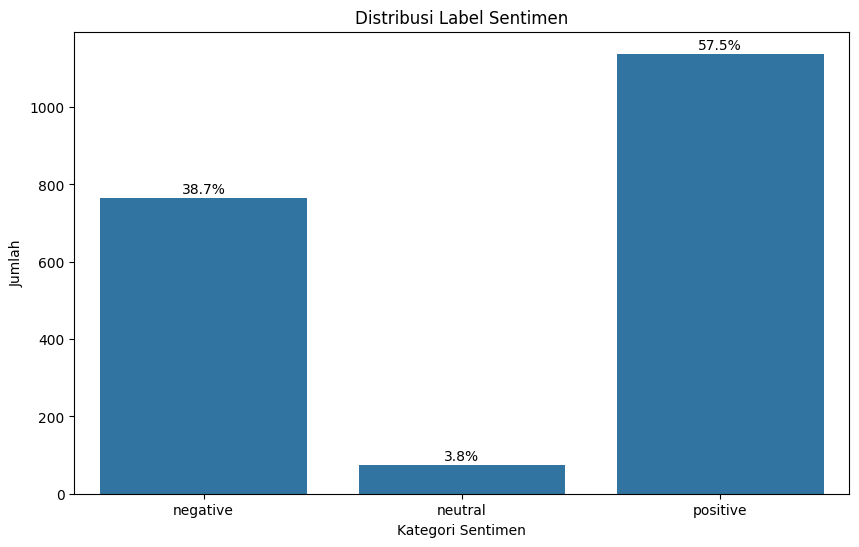

In [10]:
# Analisis distribusi label
plt.figure(figsize=(10,6))
ax = sns.countplot(x='label', data=preprocessed_df, order=['negative', 'neutral', 'positive'])
plt.title('Distribusi Label Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
# Tambahkan anotasi persentase
total = len(preprocessed_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 10
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

In [11]:
# Encode label ke bentuk numerik
le = LabelEncoder()
preprocessed_df['label_encoded'] = le.fit_transform(preprocessed_df['label'])

In [12]:
# Mapping label untuk referensi
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nMapping Label:")
print(label_mapping)


Mapping Label:
{'negative': 0, 'neutral': 1, 'positive': 2}


In [13]:
# Simpan dataframe yang sudah dilabeli
preprocessed_df.to_csv('labeled_reviews.csv', index=False)

In [14]:
# Tampilkan contoh hasil pelabelan
print("\nContoh Data Terlabel:")
print(preprocessed_df[['content', 'preprocessed_text', 'score', 'label', 'label_encoded']].sample(5))


Contoh Data Terlabel:
                                                content  \
282   susah di jangkau greb nya ssputaran Bojong gen...   
819   Udh tau saya bilang salah alamat tetap aja sen...   
1647  Koneksi aplikasi error, segera di perbaiki, en...   
477   ngasih promo ga niat, bayar pake superbank dap...   
62                            Bagus dan banyak promonya   

                                      preprocessed_text  score     label  \
282   susah jangkau greb ssputaran bojong genteng da...      2  negative   
819   udh salah alamat tetap sengaja cancel akhir ba...      1  negative   
1647  koneksi aplikasi error segera baik engineernya...      1  negative   
477   ngasih promo niat bayar pake superbank dapet d...      1  negative   
62                                bagus banyak promonya      5  positive   

      label_encoded  
282               0  
819               0  
1647              0  
477               0  
62                2  


Eksplorasi Label

In [15]:
from wordcloud import WordCloud
from collections import Counter

In [16]:
def plot_wordcloud(text, title, colormap='viridis'):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=colormap,
        max_words=100,
        stopwords=stopwords,  # Gunakan stopwords yang sudah didefinisikan sebelumnya
        contour_width=1,
        contour_color='steelblue'
    ).generate(text)

    # plt.figure(figsize=(10, 5))
    # plt.imshow(wordcloud, interpolation='bilinear')
    # plt.title(title, fontsize=15, pad=20)
    # plt.axis('off')
    # plt.show()

In [17]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1979 non-null   object
 1   userName              1979 non-null   object
 2   userImage             1979 non-null   object
 3   content               1979 non-null   object
 4   score                 1979 non-null   int64 
 5   thumbsUpCount         1979 non-null   int64 
 6   reviewCreatedVersion  1979 non-null   object
 7   at                    1979 non-null   object
 8   replyContent          1979 non-null   object
 9   repliedAt             1979 non-null   object
 10  appVersion            1979 non-null   object
 11  clean_text            1979 non-null   object
 12  casefolded_text       1979 non-null   object
 13  tokenized_text        1979 non-null   object
 14  filtered_text         1979 non-null   object
 15  stemmed_text          1979 non-null   

In [18]:
preprocessed_df['label'].value_counts()

label
positive    1138
negative     766
neutral       75
Name: count, dtype: int64

C:\Users\gians\AppData\Local\Temp\ipykernel_18716\1402488746.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=preprocessed_df,


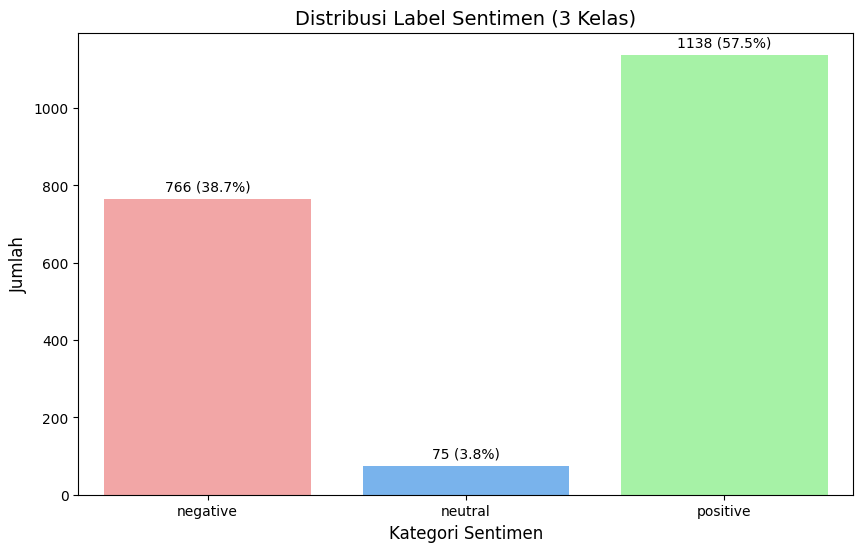

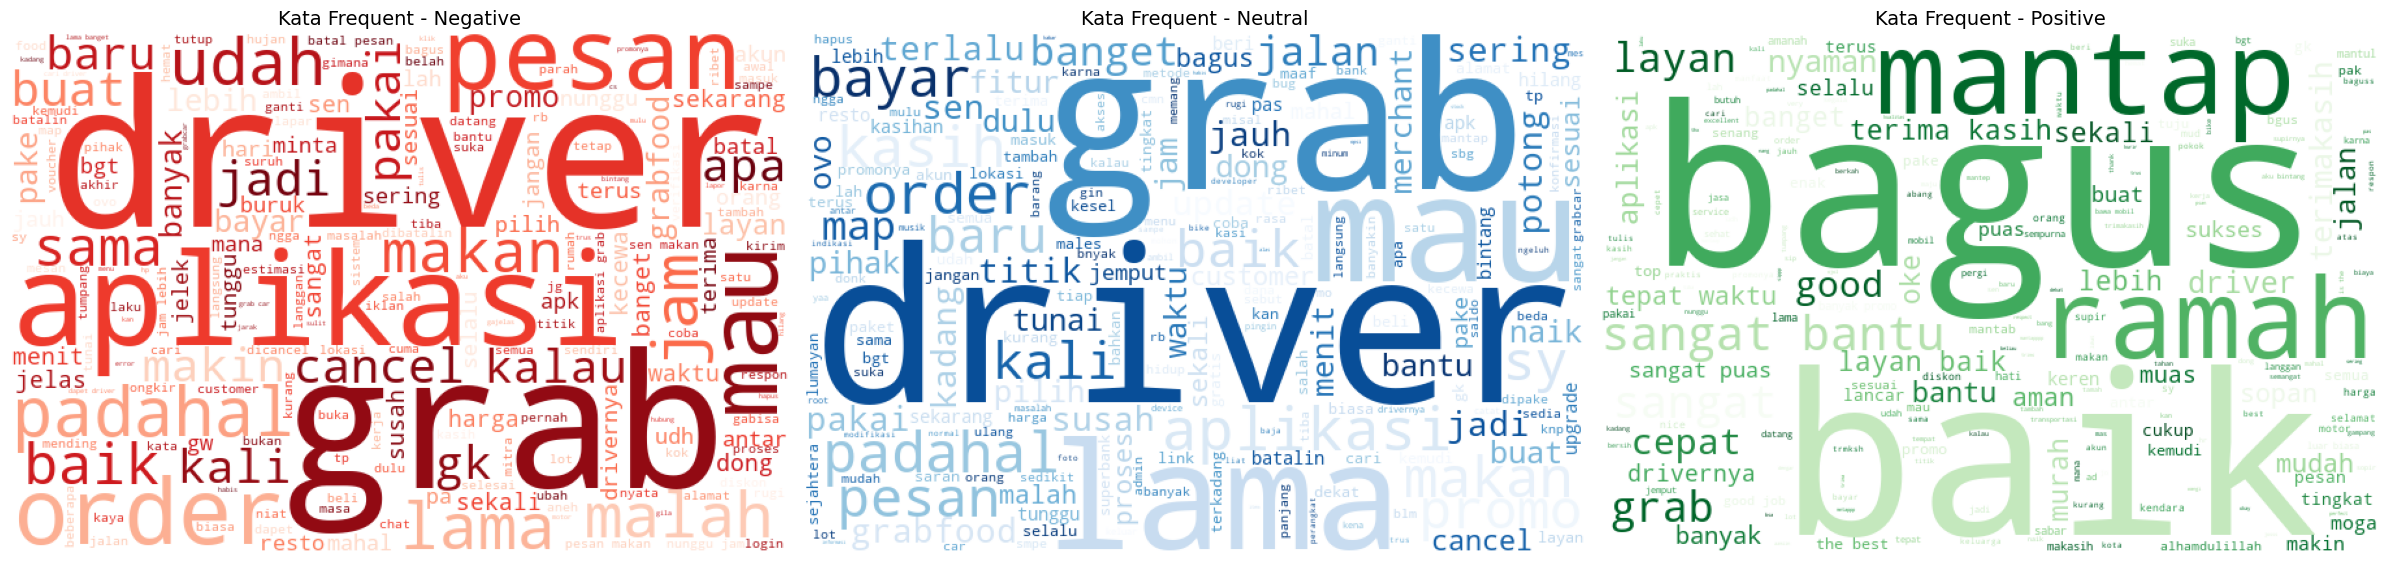

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

# 1. Analisis Distribusi Label
plt.figure(figsize=(10,6))
ax = sns.countplot(x='label', data=preprocessed_df,
                 order=['negative', 'neutral', 'positive'],
                 palette={'negative':'#ff9999', 'neutral':'#66b3ff', 'positive':'#99ff99'})

plt.title('Distribusi Label Sentimen (3 Kelas)', fontsize=14)
plt.xlabel('Kategori Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tambahkan nilai dan persentase
total = len(preprocessed_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 20,
            '{:1.0f} ({:1.1f}%)'.format(height, (height/total)*100),
            ha="center",
            fontsize=10)

plt.show()

# 2. WordCloud untuk 3 Kelas
def generate_wordclouds(df):
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))

    # Negative
    wc_neg = WordCloud(width=600, height=400,
                      background_color='white',
                      colormap='Reds',
                      stopwords=stopwords).generate(
                          ' '.join(df[df['label']=='negative']['preprocessed_text']))
    axes[0].imshow(wc_neg)
    axes[0].set_title('Kata Frequent - Negative', fontsize=14)
    axes[0].axis('off')

    # Neutral
    wc_neu = WordCloud(width=600, height=400,
                      background_color='white',
                      colormap='Blues',
                      stopwords=stopwords).generate(
                          ' '.join(df[df['label']=='neutral']['preprocessed_text']))
    axes[1].imshow(wc_neu)
    axes[1].set_title('Kata Frequent - Neutral', fontsize=14)
    axes[1].axis('off')

    # Positive
    wc_pos = WordCloud(width=600, height=400,
                      background_color='white',
                      colormap='Greens',
                      stopwords=stopwords).generate(
                          ' '.join(df[df['label']=='positive']['preprocessed_text']))
    axes[2].imshow(wc_pos)
    axes[2].set_title('Kata Frequent - Positive', fontsize=14)
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

generate_wordclouds(preprocessed_df)

In [20]:
# 3. Analisis N-Gram untuk Setiap Kelas
from nltk.util import ngrams
from collections import Counter

def plot_top_ngrams(text, n=2, top=10, title=""):
    n_grams = ngrams(text.split(), n)
    freq_dist = Counter(n_grams)
    top_grams = freq_dist.most_common(top)

    labels = [' '.join(gram) for gram, count in top_grams]
    counts = [count for gram, count in top_grams]

    plt.figure(figsize=(10,5))
    sns.barplot(x=counts, y=labels, palette='viridis')
    plt.title(f'Top {n}-gram - {title}')
    plt.xlabel('Frekuensi')
    plt.ylabel(f'{n}-gram')
    plt.show()

C:\Users\gians\AppData\Local\Temp\ipykernel_18716\4021366712.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis')


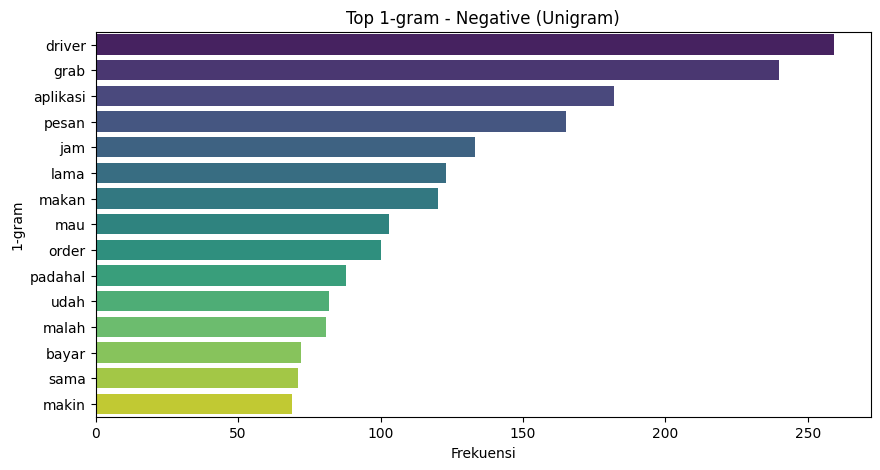

C:\Users\gians\AppData\Local\Temp\ipykernel_18716\4021366712.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis')


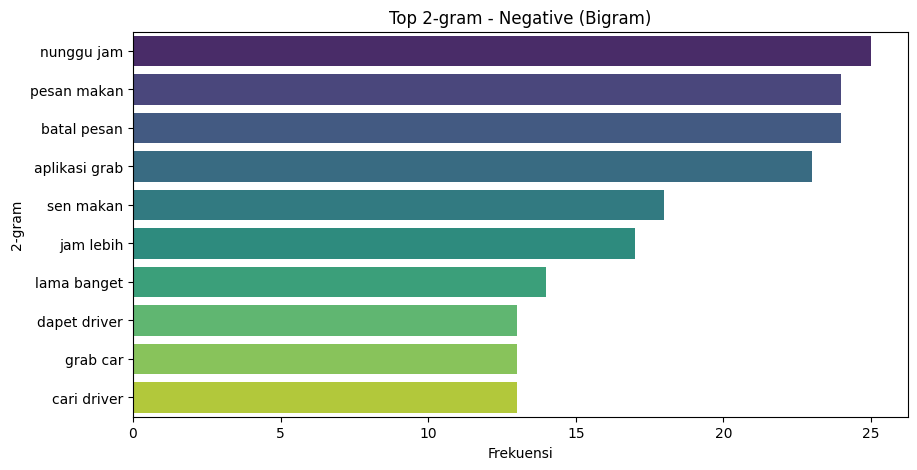

C:\Users\gians\AppData\Local\Temp\ipykernel_18716\4021366712.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis')


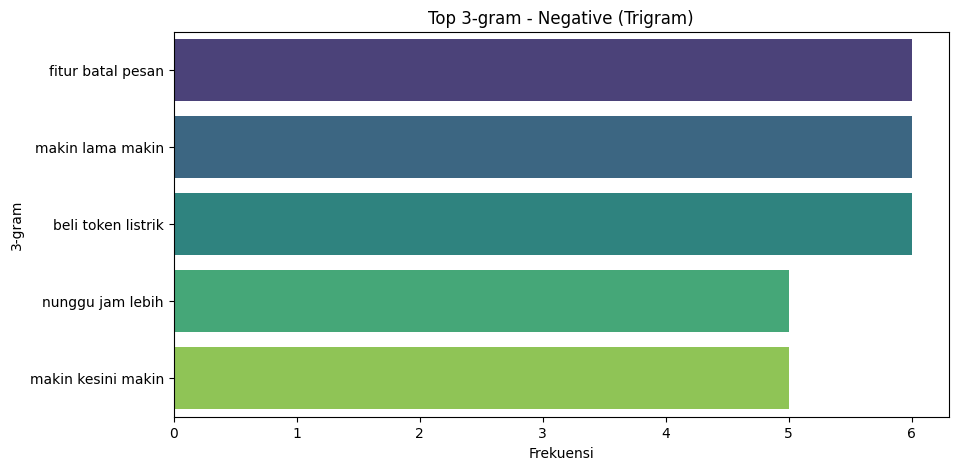

C:\Users\gians\AppData\Local\Temp\ipykernel_18716\4021366712.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis')


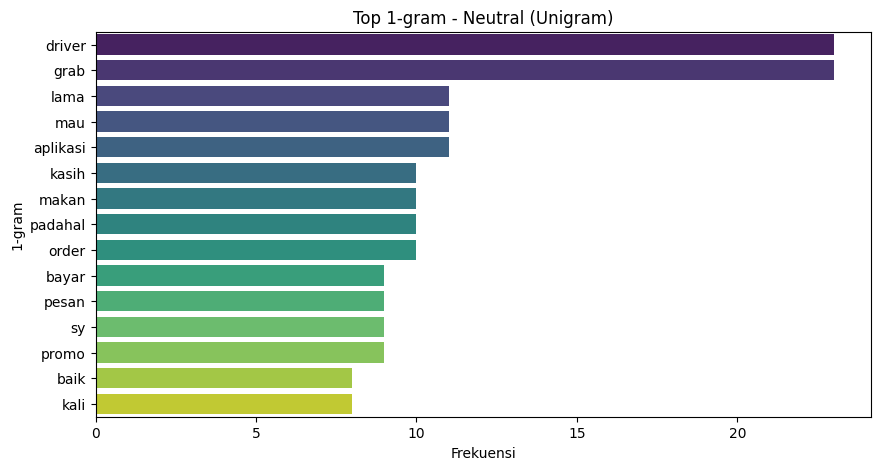

C:\Users\gians\AppData\Local\Temp\ipykernel_18716\4021366712.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis')


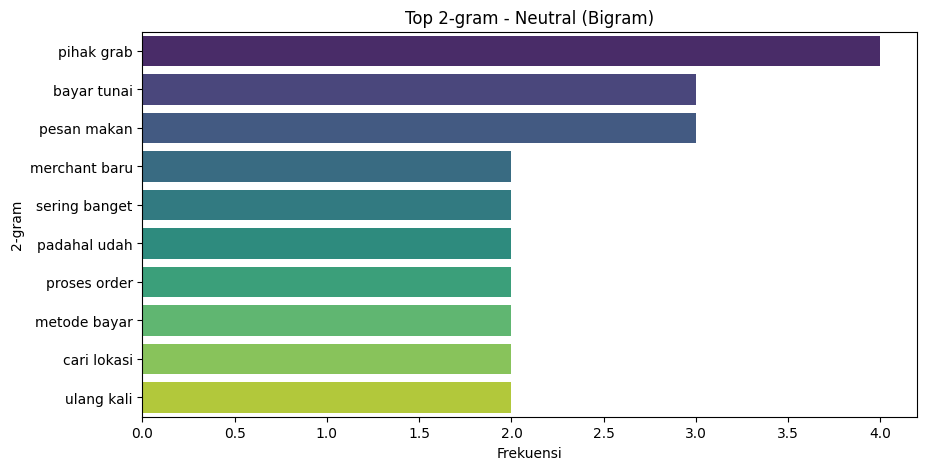

C:\Users\gians\AppData\Local\Temp\ipykernel_18716\4021366712.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis')


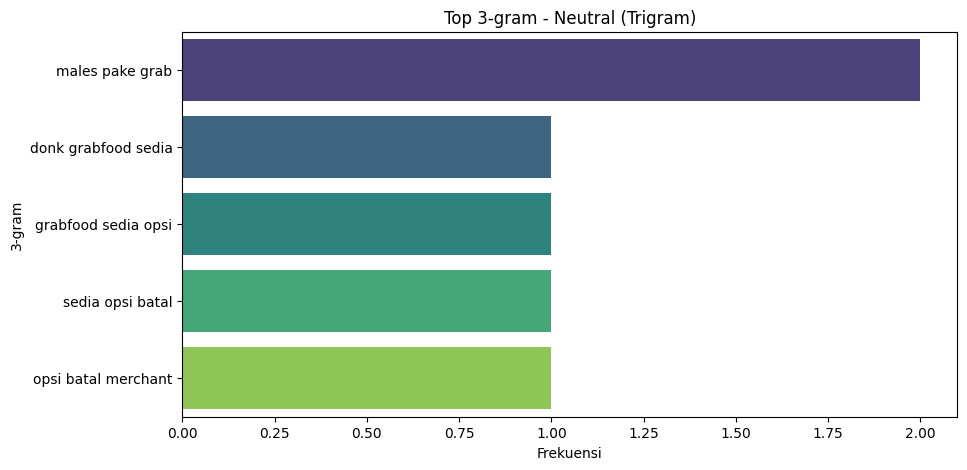

C:\Users\gians\AppData\Local\Temp\ipykernel_18716\4021366712.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis')


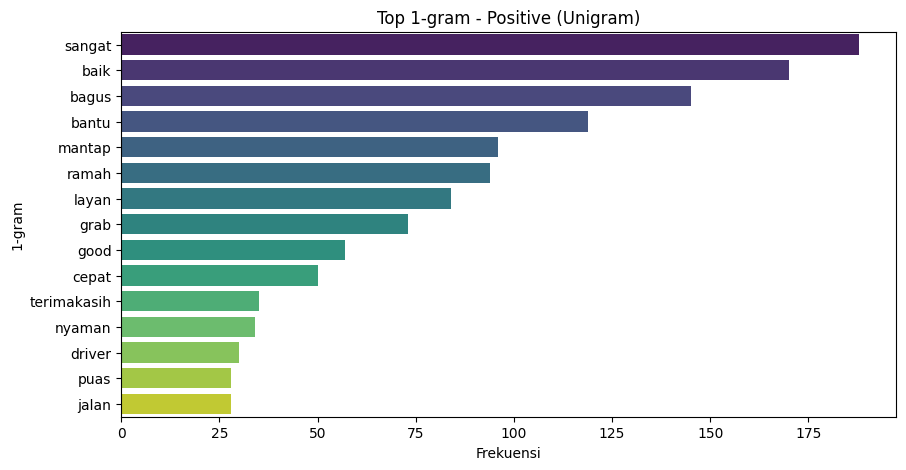

C:\Users\gians\AppData\Local\Temp\ipykernel_18716\4021366712.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis')


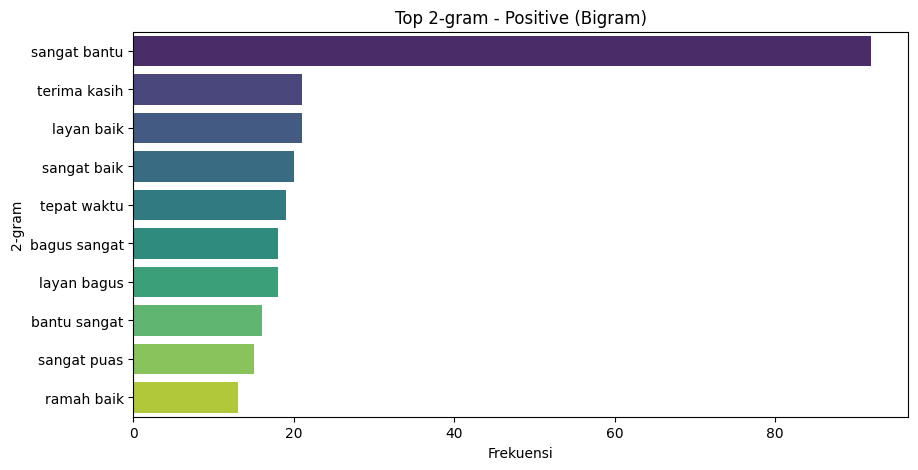

C:\Users\gians\AppData\Local\Temp\ipykernel_18716\4021366712.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis')


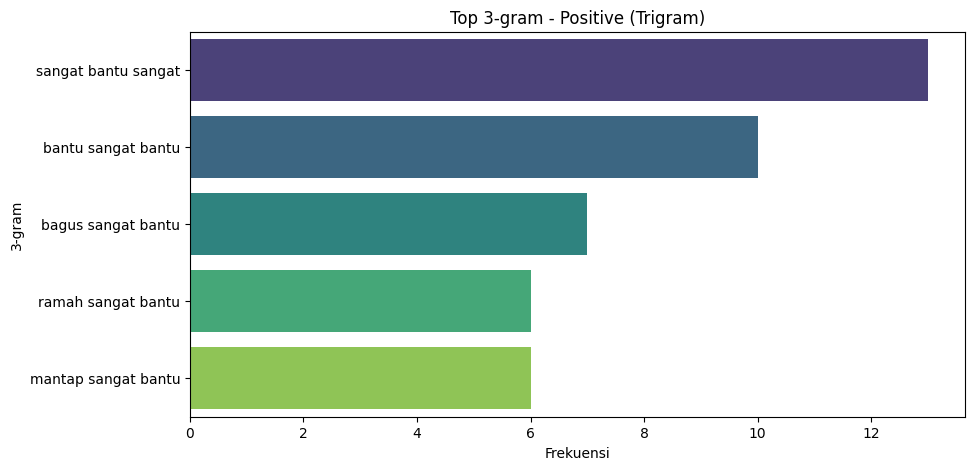

In [21]:
# Analisis untuk setiap kelas
for label in ['negative', 'neutral', 'positive']:
    text = ' '.join(preprocessed_df[preprocessed_df['label']==label]['preprocessed_text'])

    # Unigram
    plot_top_ngrams(text, n=1, top=15,
                  title=f'{label.capitalize()} (Unigram)')

    # Bigram
    plot_top_ngrams(text, n=2, top=10,
                  title=f'{label.capitalize()} (Bigram)')

    # Trigram
    plot_top_ngrams(text, n=3, top=5,
                  title=f'{label.capitalize()} (Trigram)')


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# 1. Data Splitting dengan Stratifikasi
X = preprocessed_df['preprocessed_text']
y = preprocessed_df['label_encoded']

# Split dengan menjaga distribusi kelas
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [24]:
# 2. TF-IDF Vectorizer dengan Optimasi Bahasa Indonesia
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),  # Mencakup unigram dan bigram
    max_features=5000,    # Batasi dimensi fitur
    min_df=5,             # Term muncul minimal di 5 dokumen
    max_df=0.7,           # Term muncul maksimal di 70% dokumen
    sublinear_tf=True,    # Gunakan log scale untuk term frequency
    use_idf=True,
    smooth_idf=True,
    lowercase=False       # Karena sudah case folding
)

# Fitting dan transform data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Oversampling

In [26]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# 3️⃣ Oversampling dengan SMOTE
print("Distribusi kelas sebelum SMOTE:", Counter(y_train))

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Terapkan SMOTE hanya pada data training
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Cek distribusi kelas setelah oversampling
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))

Distribusi kelas sebelum SMOTE: Counter({2: 910, 0: 613, 1: 60})
Distribusi kelas setelah SMOTE: Counter({2: 910, 0: 910, 1: 910})


c:\Users\gians\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\gians\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Modelling

skema 1

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model SVM
svm_model = SVC(
    kernel='rbf',
    C=100,
    class_weight='balanced',  # Menangani class imbalance
    probability=True,
    random_state=42
)

# Training model pada data latih
svm_model.fit(X_train_tfidf, y_train)

# Evaluasi pada data training
y_train_pred = svm_model.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("SVM Training Accuracy:", train_accuracy)

print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred, target_names=['negative', 'neutral', 'positive']))

# Evaluasi pada data testing
y_test_pred = svm_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nSVM Testing Accuracy:", test_accuracy)

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred, target_names=['negative', 'neutral', 'positive']))


SVM Training Accuracy: 0.9823120656980417

Classification Report (Training Data):
              precision    recall  f1-score   support

    negative       0.99      0.97      0.98       613
     neutral       0.92      0.92      0.92        60
    positive       0.98      0.99      0.99       910

    accuracy                           0.98      1583
   macro avg       0.96      0.96      0.96      1583
weighted avg       0.98      0.98      0.98      1583


SVM Testing Accuracy: 0.8585858585858586

Classification Report (Testing Data):
              precision    recall  f1-score   support

    negative       0.80      0.89      0.84       153
     neutral       0.00      0.00      0.00        15
    positive       0.91      0.89      0.90       228

    accuracy                           0.86       396
   macro avg       0.57      0.59      0.58       396
weighted avg       0.84      0.86      0.85       396



In [28]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Model SVM
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    class_weight='balanced',  # Handle class imbalance
    probability=True,
    random_state=42
)

# Training
svm_model.fit(X_train_tfidf, y_train)

# Evaluasi
y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['negative', 'neutral', 'positive']))

SVM Accuracy: 0.8636363636363636

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.92      0.85       153
     neutral       0.00      0.00      0.00        15
    positive       0.93      0.88      0.91       228

    accuracy                           0.86       396
   macro avg       0.58      0.60      0.59       396
weighted avg       0.85      0.86      0.85       396



skema 2

In [29]:
from xgboost import XGBClassifier
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Word2Vec Model Training
sentences = [text.split() for text in X_train]
w2v_model = Word2Vec(
    sentences,
    vector_size=200,    # Meningkatkan ukuran vektor (default: 100)
    window=10,          # Memperluas jendela konteks (default: 5)
    min_count=2,        # Mengabaikan kata yang muncul kurang dari 2 kali
    workers=4,
    sg=1                # Gunakan skip-gram untuk menangkap hubungan kata lebih baik
)

# Fungsi untuk mengubah teks menjadi vektor
def text_to_vector(text):
    words = text.split()
    vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]

    if len(vectors) == 0:  # Jika tidak ada kata yang cocok di Word2Vec
        return np.zeros(200)  # Pastikan ukurannya sesuai dengan vector_size

    return np.mean(vectors, axis=0)


# Konversi data ke vektor
X_train_w2v = np.vstack([text_to_vector(text) for text in X_train])
X_test_w2v = np.vstack([text_to_vector(text) for text in X_test])

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_w2v, y_train)

# Evaluasi pada data training
y_train_pred = xgb_model.predict(X_train_w2v)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Random Forest Training Accuracy:", train_accuracy)

print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred, target_names=['negative', 'neutral', 'positive']))

# Evaluasi pada data testing
y_test_pred = xgb_model.predict(X_test_w2v)
print("XGBoost Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred, target_names=['negative', 'neutral', 'positive']))


c:\Users\gians\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:21:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Training Accuracy: 0.9905243209096652

Classification Report (Training Data):
              precision    recall  f1-score   support

    negative       1.00      0.99      0.99       613
     neutral       1.00      0.92      0.96        60
    positive       0.99      1.00      0.99       910

    accuracy                           0.99      1583
   macro avg       0.99      0.97      0.98      1583
weighted avg       0.99      0.99      0.99      1583

XGBoost Accuracy: 0.8585858585858586

Classification Report (Testing Data):
              precision    recall  f1-score   support

    negative       0.79      0.89      0.83       153
     neutral       0.00      0.00      0.00        15
    positive       0.91      0.89      0.90       228

    accuracy                           0.86       396
   macro avg       0.57      0.59      0.58       396
weighted avg       0.83      0.86      0.84       396



c:\Users\gians\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gians\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gians\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

skema 3

In [31]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Hitung class weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Konversi ke dictionary
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weight_dict)

Class Weights: {0: 0.8607939097335509, 1: 8.794444444444444, 2: 0.5798534798534799}


In [32]:
X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(
    X_train, y_train,
    test_size=0.3,
    stratify=y_train,
    random_state=42
)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Resplit data 70/30
X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_tfidf, y_train,
    test_size=0.3,
    stratify=y_train,
    random_state=42
)

# Konversi ke format LSTM
X_train_lstm = X_train_lstm.toarray().reshape((X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_val_lstm = X_val_lstm.toarray().reshape((X_val_lstm.shape[0], 1, X_val_lstm.shape[1]))

# Model LSTM
lstm_model = Sequential([
    Input(shape=(1, X_train_tfidf.shape[1])),  # Input layer dengan shape yang sesuai
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training dengan class weight
history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_val_lstm, y_val_lstm),
    epochs=20,
    batch_size=128,
    class_weight=class_weight_dict  # Gunakan class weight untuk imbalance
)

# Evaluasi
y_pred_lstm = lstm_model.predict(X_val_lstm).argmax(axis=1)
print("LSTM Accuracy:", accuracy_score(y_val_lstm, y_pred_lstm))
print("\nClassification Report:")
print(classification_report(y_val_lstm, y_pred_lstm, target_names=['negative', 'neutral', 'positive']))

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.3505 - loss: 1.1278 - val_accuracy: 0.3642 - val_loss: 1.0970
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5047 - loss: 1.0698 - val_accuracy: 0.7474 - val_loss: 1.0844
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7869 - loss: 1.0556 - val_accuracy: 0.8821 - val_loss: 1.0617
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8644 - loss: 1.0791 - val_accuracy: 0.8800 - val_loss: 1.0147
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8828 - loss: 0.9627 - val_accuracy: 0.8989 - val_loss: 0.9209
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8966 - loss: 0.9398 - val_accuracy: 0.8947 - val_loss: 0.7772
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8931 - loss: 0.8923 - val_accuracy: 0.9074 - val_loss: 0.6146
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8976 - loss: 0.7661 - val_accuracy: 0.9074 - val_loss: 0.5013